# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [148]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [149]:
#load and inspect the data

# YOUR CODE HERE
df = melbourne_data=pd.read_csv('reg_data.csv')
#raise NotImplementedError()
df.describe()

,X,Y
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


In [150]:
assert df.shape == (100,2)

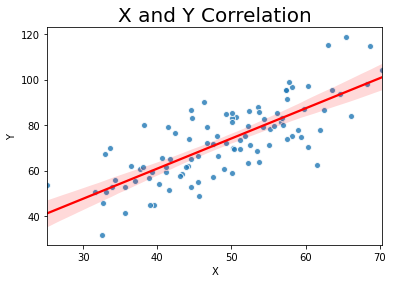

Correlation coefficient between X and Y is         X       Y
X  1.0000  0.7737
Y  0.7737  1.0000


In [151]:
#plot the data (scatter)
# YOUR CODE HERE
import  seaborn as sns
def correlation(df):
    g=sns.regplot(x = 'X', y = 'Y', line_kws={"color": "red"}, data = df, scatter_kws={'edgecolor':'white'})
    plt.title('X and Y Correlation', fontsize='20')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    corr_coeff= df.corr()
    print (f"Correlation coefficient between X and Y is {round(corr_coeff,4)}")
correlation(df)


#raise NotImplementedError()

In [152]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE
x_train, x_test, y_train, y_test = train_test_split(df.X, df.Y, random_state=0, test_size=0.2)


In [153]:
assert x_train.shape == (80,)
assert x_test.shape == (20,)
assert y_train.shape == (80,)
assert y_test.shape == (20,)

In [154]:
#implement a least squares function to find a, b
x_mean = 0
y_mean = 0
b_upper = 0
b_lower = 0
b = 0
a = 0
#b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2
# a = y_mean - b * x_mean.
x_mean=x_train.mean()
y_mean=y_train.mean()
for el in range(x_train.shape[0]):
    b_upper += (x_train.values[el]-x_mean)*(y_train.values[el]-y_mean)
    b_lower += (x_train.values[el]-x_mean)**2
b=b_upper/b_lower
a=y_mean-b*x_mean
print (a)
print (b)

6.687439682550206
1.3450919020620415


In [165]:
assert abs(a - 7.72) <=0.03
assert abs(b - 1.32) <=0.03

AssertionError: 

Text(0.5, 0, 'x')

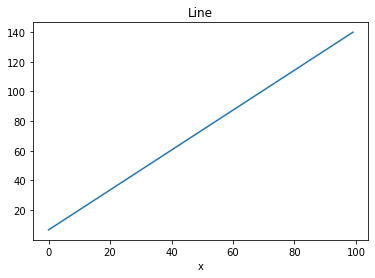

In [161]:
line = 0
x = np.array(np.arange(0,100))
line = a + b * x
plt.plot(line)
plt.title ('Line')
plt.xlabel('x')

In [164]:
assert abs(a +3*b - 11.69) <= 0.05
assert abs(a +100*b - 140) <= 1

AssertionError: 

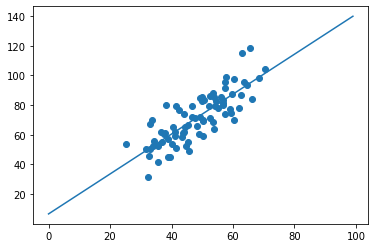

In [166]:
# YOUR CODE HERE

plt.plot(line)
plt.scatter(x_train,y_train)

#raise NotImplementedError()

In [167]:
#Classify your test data in to classes
#if the Y value for a certain X is lower than the line then the class is 0
class_0 = []
class_1 = []

# YOUR CODE HERE
for i in range(x_test.shape[0]):
    
    #We check the line value vs the real Y value
    if y_test.values[i] < (a + x_test.values[i]*b):
        class_0.append( (x_test.values[i],y_test.values[i]) )
    else:
        class_1.append(( x_test.values[i],y_test.values[i]) )

#raise NotImplementedError()
        
class_0 = np.array(class_0)
class_1 = np.array(class_1)
print(class_0.shape)
print(class_1.shape)

(11, 2)
(9, 2)


In [168]:
assert 9 < class_0.shape[0] < 13
assert 7 < class_1.shape[0] < 11

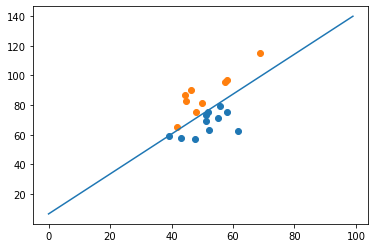

In [169]:
# YOUR CODE HERE
plt.scatter(class_0[:,0],class_0[:,1])
plt.scatter(class_1[:,0],class_1[:,1])
plt.plot(line)
#raise NotImplementedError()

In [170]:
# get the total error for the classes

err = 0
# YOUR CODE HERE


for i in range(x_test.shape[0]):
    
    err += abs(y_test.values[i] - (a + x_test.values[i]*b))

print(err)

201.82447860643398


In [ ]:
assert err - 201 < 20